## 4.1 Convex hull
**Victor Misael Esclaante Alvarado, A01741176**

Algoritmo de jarvis para resolver el probelma de Convex-Hull

## Funcioens de la clase

1. funcion para leer un archivo

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

def lee_archivo(archivo):
	f = open(archivo, "r")
	contenido = f.read()
	f.close()

	lines = contenido.split("\n")
	n = int(lines[0])
	points = [ list(map(float, lines[i].split("\t")))  for i in range(1, len(lines)-1 )]

	return n, points

2. Funcion Para imprimir los resultados

In [2]:
def draw_hull( puntos, elegidos, lowest, text):
	# Esto grafica todos los puntos con colores random, y semi-trasparentes
	
	elegidos.append(elegidos[0])
	colors = np.random.rand(len(puntos))
	plt.title(text)
	plt.scatter([p[0] for p in puntos], [p[1] for p in puntos], c=colors, alpha=0.5)

	# Ponemos los elegidos con color azul
	plt.scatter([p[0] for p in elegidos], [p[1] for p in elegidos], c='blue')
	#
	# Usa plot para graficar el poligono
	plt.plot([p[0] for p in elegidos], [p[1] for p in elegidos], c='blue')

	# text es el nombre de la instancia de prueba, agregado como texto a la grafica

	plt.show()

3. Funcion para la orientacion de 3 puntos

In [3]:
# Funcion para encontrar la orientacion de un conjunto de tres puntos
def orientacion(p1, p2, p3):
    
    val = (p2[1]-p1[1])*(p3[0]-p2[0]) - (p2[0]-p1[0])*(p3[1]-p2[1])
    
    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return -1

## Algoritmo de jarvis


In [4]:
 
# encunetra el punto mas a la izquierda para ser el inicial
def Left_index(points):
     
    minn = 0
    for i in range(1,len(points)):
        if points[i][0]< points[minn][0]:
            minn = i
        elif points[i][0] == points[minn][0]:
            if points[i][1] > points[minn][1]:
                minn = i
    return minn
  
def convexHull(points, n):
     
    # Encontrar el punto mas a la izquierda
    l = Left_index(points)
    hull = []

    p = l
    q = 0
    while(True):
        hull.append(p)
        q = (p + 1) % n

        for i in range(n):
            if orientacion(points[p], points[i], points[q]) == -1:
                q = i

        p = q

        if p == l:
            break

    elegidos = [points[i] for i in hull]
    return elegidos, l
    

## Ejecicion de las instancias

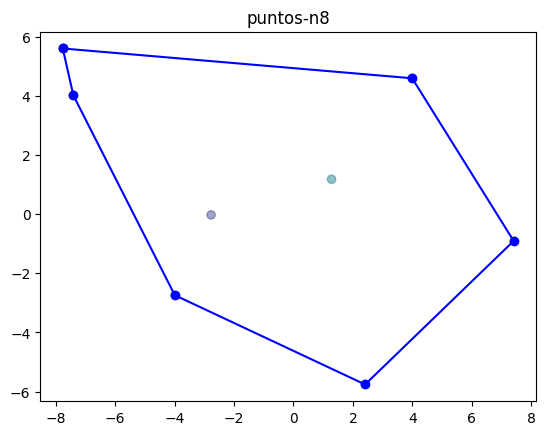

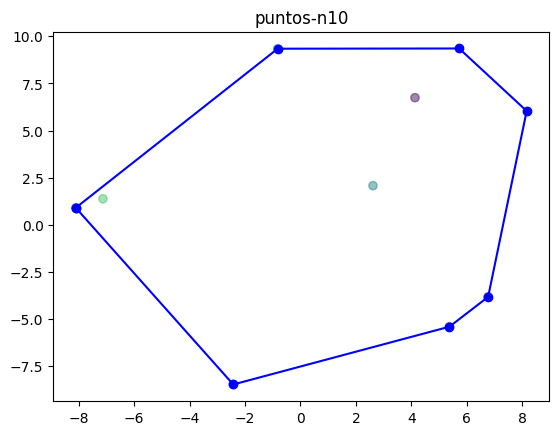

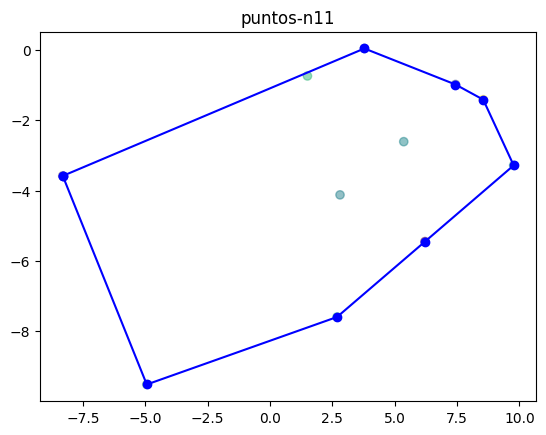

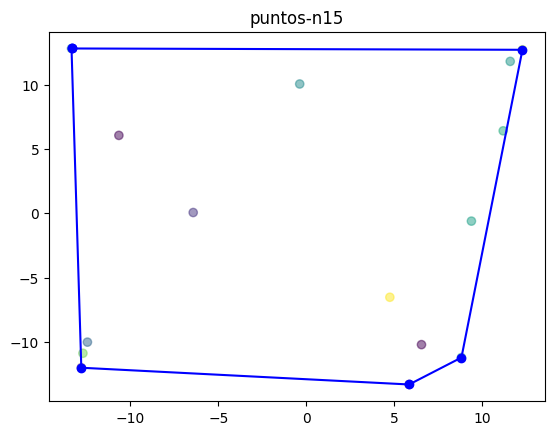

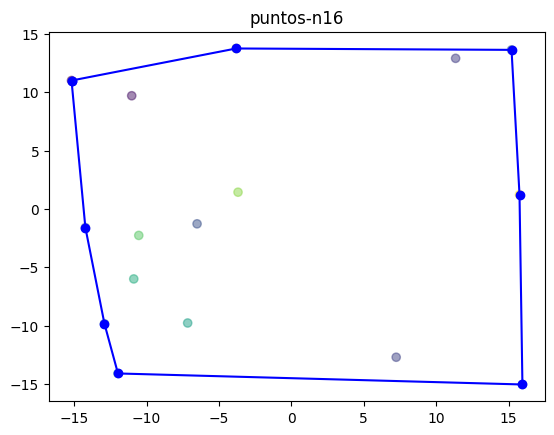

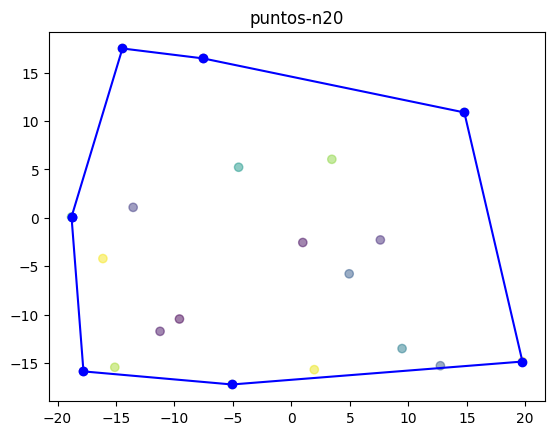

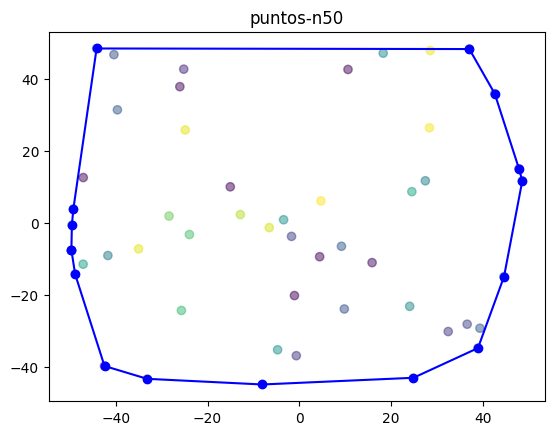

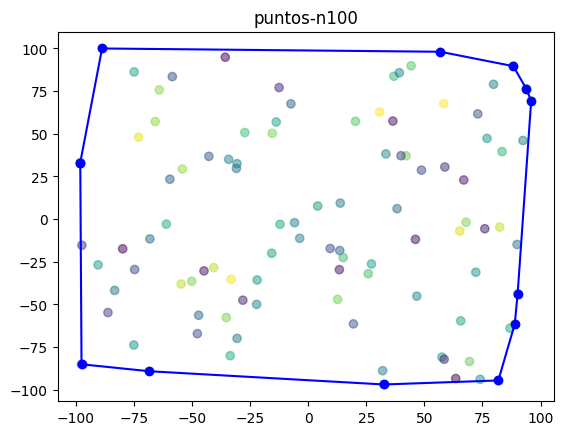

In [5]:

file_names =[
            "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/Scripts/Python/txt/puntos-n8.txt",
            "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/Scripts/Python/txt/puntos-n10.txt",
            "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/Scripts/Python/txt/puntos-n11.txt",
            "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/Scripts/Python/txt/puntos-n15.txt",
            "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/Scripts/Python/txt/puntos-n16.txt",
            "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/Scripts/Python/txt/puntos-n20.txt",
            "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/Scripts/Python/txt/puntos-n50.txt",
            "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/Scripts/Python/txt/puntos-n100.txt"]

titles = [ "puntos-n8", "puntos-n10", "puntos-n11", "puntos-n15", "puntos-n16", "puntos-n20", "puntos-n50", "puntos-n100"]

# metemos los 8 plots en un mega plot


for i in range(8):
    file_name = file_names[i]
    #print(file_name)
    n, puntos = lee_archivo(file_name)

    elegidos, lowest = convexHull(puntos, len(puntos))
    #print(elegidos)

    draw_hull(puntos, elegidos, lowest, titles[i])
